In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
class Image(object):
    def __init__(self,path):
        self.path=path
        self.bgr_img=None
        self.rgb_img=None
        self.gray_img=None

    def rgb(self,return_img=False):
        ''' Convert to RGB'''
        self.rgb_img=cv2.cvtColor(self.bgr_img,cv2.COLOR_BGR2RGB)
        if return_img:
            return self.rgb_img


    def gray(self,return_img=False):
        ''' Convert to RGB'''
        self.gray_img=cv2.cvtColor(self.bgr_img,cv2.COLOR_BGR2GRAY)
        if return_img:
            return self.gray_img

    def show(self,img,title='Image',cv2_show=False):
        if cv2_show:
            cv2.imshow(str(title),img)
        else:
            if len(img.shape) !=3:
                plt.imshow(img,cmap='gray')
            else:
                plt.imshow(img)
        plt.title(str(title))
        plt.show()

    def show_all(self,imgs_list,titles_list):
        plt.figure(figsize=[20,10])
        assert len(imgs_list) == len(titles_list),"Houston we've got a problem"
        N=len(imgs_list)
        for i,(img,title) in enumerate(zip(imgs_list,titles_list)):
            plt.subplot(1,N,i+1)
            if len(img.shape) !=3:
                plt.imshow(img,cmap='gray')
            else:
                plt.imshow(img)
            plt.title(str(title))
        plt.show()

    def read_image(self,return_img=False):
        '''Read image from directory,
         Remember the image read with cv2 and it will be BGR '''
        try:
            self.bgr_img=cv2.imread(str(self.path))
            if return_img:
                return self.bgr_img
        except Exception as e:
            raise Exception('oops! something went worng')





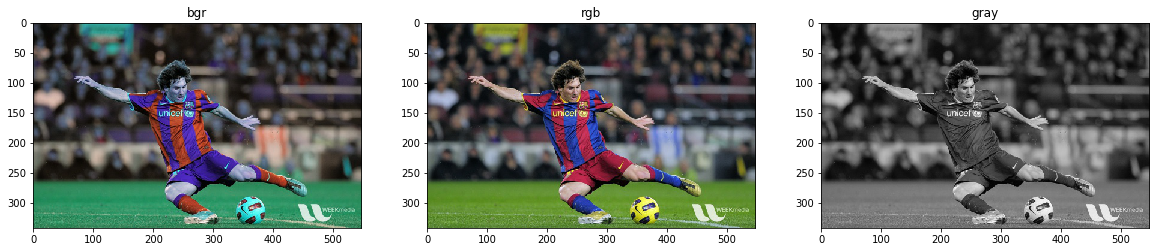

In [3]:
img=Image('messi.jpg')
bgr=img.read_image(return_img=True)
rgb=img.rgb(return_img=True)
gray=img.gray(return_img=True)
img.show_all([bgr,rgb,gray],['bgr','rgb','gray'])


In [4]:
def dimension(image,kernel):
    
    if len(image.shape) != 2:
        output=np.zeros_like(image)
        for dim in range(image.shape[2]):
            output[:,:,dim] = convol2d(image[:,:,dim],kernel)
    else:
          output=convol2d(image,kernel)

    return output
    



In [5]:
def convol2d(image,kernel):
    kernel=np.flip(np.flip(kernel,axis=0),axis=1)
    output=np.zeros_like(image)
    image_pad= np.pad(image,(kernel.shape[0]//2,kernel.shape[1]//2), 'constant', constant_values=(0, 0))
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            output[x][y] = (kernel*image_pad[x:x+kernel.shape[0],y:y+kernel.shape[1]]).sum()
    return output
    



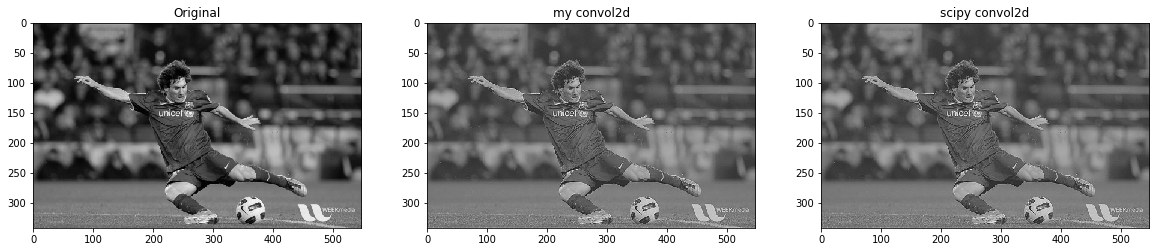

In [6]:
img=Image('messi.jpg')
bgr=img.read_image(return_img=True)
gray=img.gray(return_img=True)

kernel=np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])/4
image_equalized=gray/np.max(np.abs(gray))
image_kernel=dimension(image_equalized,kernel)
image_kernel*=255

plt.figure(figsize=[20,10])

plt.subplot(131)
plt.imshow(image_equalized,cmap=plt.cm.gray)
plt.title('Original')


plt.subplot(132)
plt.imshow(image_kernel,cmap=plt.cm.gray)
plt.title('my convol2d')

import scipy.signal
image_kernel_sci=scipy.signal.convolve2d(gray,kernel,'same')
plt.subplot(133)
plt.imshow(image_kernel_sci,cmap=plt.cm.gray)
plt.title('scipy convol2d')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


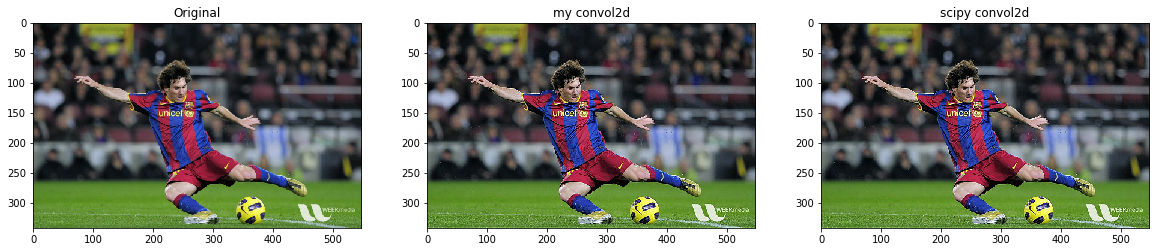

In [7]:


kernel=np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])/4

image_equalized=rgb/np.max(np.abs(rgb))

image_kernel=dimension(image_equalized,kernel)
plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(image_equalized)
plt.title('Original')


plt.subplot(132)
plt.imshow(image_kernel)
plt.title('my convol2d')



import scipy.signal
image_kernel_sci = np.zeros_like(image_equalized)
for dim in range(rgb.shape[2]):
    image_kernel_sci[:,:,dim] = scipy.signal.convolve2d(image_equalized[:,:,dim], kernel, 'same')
plt.subplot(133)
plt.imshow(image_kernel_sci)
plt.title('scipy convol2d')

plt.show()



#  sobel:


In [8]:
def scaleMinMax(img):
    img-=img.min()
    return img/np.max(np.abs(img))


In [9]:
def subplot(rows,cols,images,titles):
    plt.figure(figsize=[20,10])

    i=1
    while(i<=rows*cols):
        plt.subplot(rows,cols,i)
        plt.imshow(images[i-1],cmap=plt.cm.gray)
        plt.title(titles[i-1])
        i+=1
    plt.show()


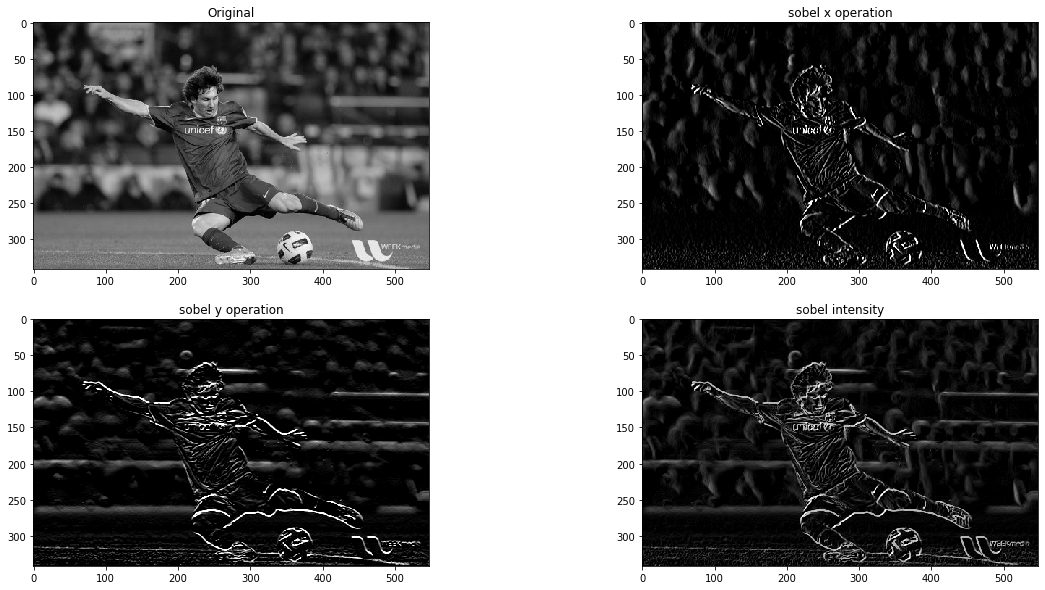

In [10]:
img=cv2.imread('messi.jpg',0)

sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)

normx=scaleMinMax(sobelx)
normy=scaleMinMax(sobely)
sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(normx, 2.0), 1.0, cv2.pow(normy, 2.0), 1.0, 0.0))
subplot(2,2,[img,sobelx,sobely,sobel],['Original',f'sobel x operation'
                                       ,f'sobel y operation',f'sobel intensity'])

# CANNY:

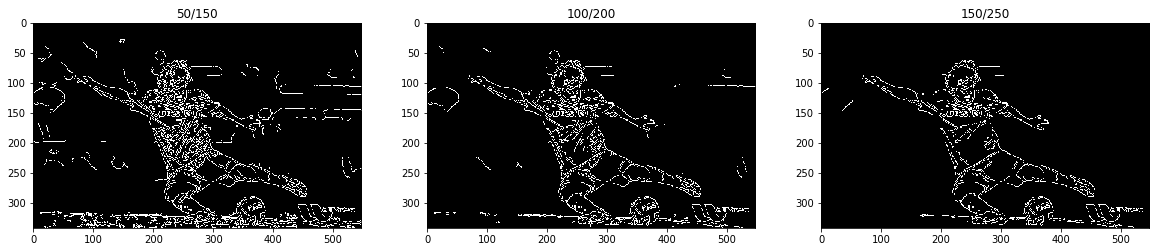

In [11]:
img=cv2.imread('messi.jpg',0)
edges50150=cv2.Canny(img,50,150)
edges100200=cv2.Canny(img,100,200)
edges150250=cv2.Canny(img,150,250)

subplot(1,3,[edges50150,edges100200,edges150250],['50/150','100/200','150/250'])

# FIND CONTOURS

## WITHOUT threshold (SOBEL METHOD)

In [12]:
def sobel(img):
    sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
    sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)

    normx=scaleMinMax(sobelx)
    normy=scaleMinMax(sobely)
    sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(normx, 2.0), 1.0, cv2.pow(normy, 2.0), 1.0, 0.0))
    return sobel


[[0.         0.         0.         ... 0.         0.00784314 0.        ]
 [0.00784314 0.00392157 0.00392157 ... 0.01568627 0.01753779 0.01568627]
 [0.         0.00392157 0.01176471 ... 0.03137255 0.02772968 0.02352941]
 ...
 [0.00784314 0.00392157 0.         ... 0.         0.05490196 0.        ]
 [0.         0.         0.         ... 0.01960784 0.01568627 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


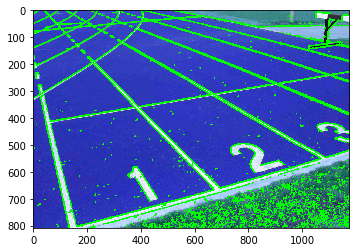

In [16]:
img=cv2.imread('track.jpg')#read as gray scale
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
bilateral = cv2.bilateralFilter(imgray, 5, 11, 11) 
s=sobel(bilateral)
print(s)
s=cv2.convertScaleAbs(s)
print(s)
contours = cv2.findContours(s.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours[1], -1, (0, 255, 0), 3)

plt.imshow(img)



## with canny (with trathreshold)

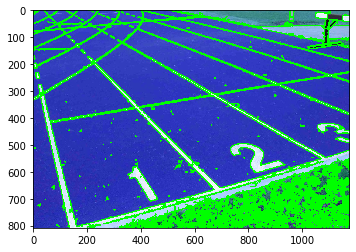

In [14]:
img=cv2.imread('track.jpg')#read as gray scale
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

bilateral = cv2.bilateralFilter(imgray, 5, 11, 11) 
edges150250b=cv2.Canny(bilateral,10,250)
# print(edges150250b)
contours = cv2.findContours(edges150250b.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours[1], -1, (0, 255, 0), 3)

plt.imshow(img)


In [7]:
# Not part of the final report

def convol2d_previous_version(image,kernel):
    lenght,width=image.shape
    output=np.zeros_like(image)
    k_mid_i,k_mid_j=get_mid_kernel(kernel)
    for i in np.arange(lenght):
        for j in np.arange(width):
            mini_mat_i=np.arange(i-k_mid_i,i+k_mid_i)
            mini_mat_j=np.arange(j-k_mid_j,j+k_mid_j)
            val=matrix_multiplication(image,mini_mat_i,mini_mat_j,kernel)
            output[i][j]=val
    return output

import math
def get_mid_kernel(kernel):
    i,j=kernel.shape
    i=math.floor(i/2)
    j=math.floor(j/2)
    return i,j
  

def matrix_multiplication(image,rows,cols,kernel):
    
    val_list=[]
    for i,row in enumerate(rows):
        for j,col in enumerate(cols):
            try:
                val_list.append(image[row][col]*kernel[i][j])
            except IndexError:
                val_list.append(0)
    return np.sum(val_list)


In [18]:
from PIL import Image
n = Image.new('RGB', (500,500))
n.show()